*Let’s take a moment to read the official documentation on pie charts in matplotlib to make sure we understand how to customize these on your own –?
*

https://docs.google.com/presentation/d/1pYLLcaXdalJiE32anMnoXE2jC1u_IPEohaDJmV4UrIA/edit?usp=sharing

*Exercise #1:*
Look at this code below and reference the documentation, try it in your environment and see if you understand what the code did!
(see the same code with comments in the next slide for answers -  ask questions if you do not fully understand it)


In [ ]:
# pie Chart

import matplotlib.pyplot as plt
# we set the figure size bigger at 6 by 6 inches
# dpi means dots/pixels per inch, it basically makes the graph sharper
plt.figure(figsize = (6,6), dpi = 300)

plt.style.use('ggplot')

labels = ["Freshman","Sophomore","Junior","Senior"]
numbers = [16,30,45,10]
explode = (0, 0, 0.1, 0)
# added hatches for all the pie pieces, but really only for the second one
# there are more kinds of hatches you can choose from too!
hatches = ["", "/", "", ""]


# added hatches for all the pie pieces, but really only for the second one
# same as explode

plt.pie(numbers = numbers, labels = labels, explode = explode)

# finally, we have added a title for the graph
# fontdict gives us access to pass on more cutomization of the font for the title in the form of a dictionary
# fontdict is a parameter for many text based methods/functions in matplotlib, like xlabel and ylabel in a line graph
plt.title("Distribution of Undergrates", fontdict = {"color": "darkgreen","fontweight": "bold", "fontsize": 18})

plt.show()


TypeError: pie() got an unexpected keyword argument 'numbers'

<Figure size 1800x1800 with 0 Axes>

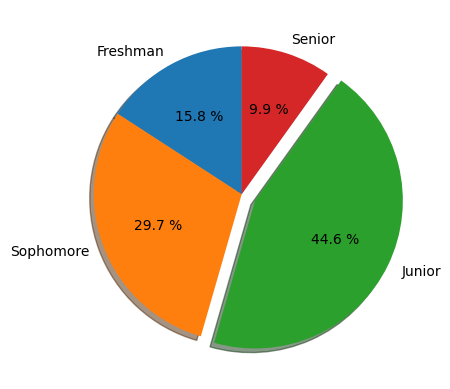

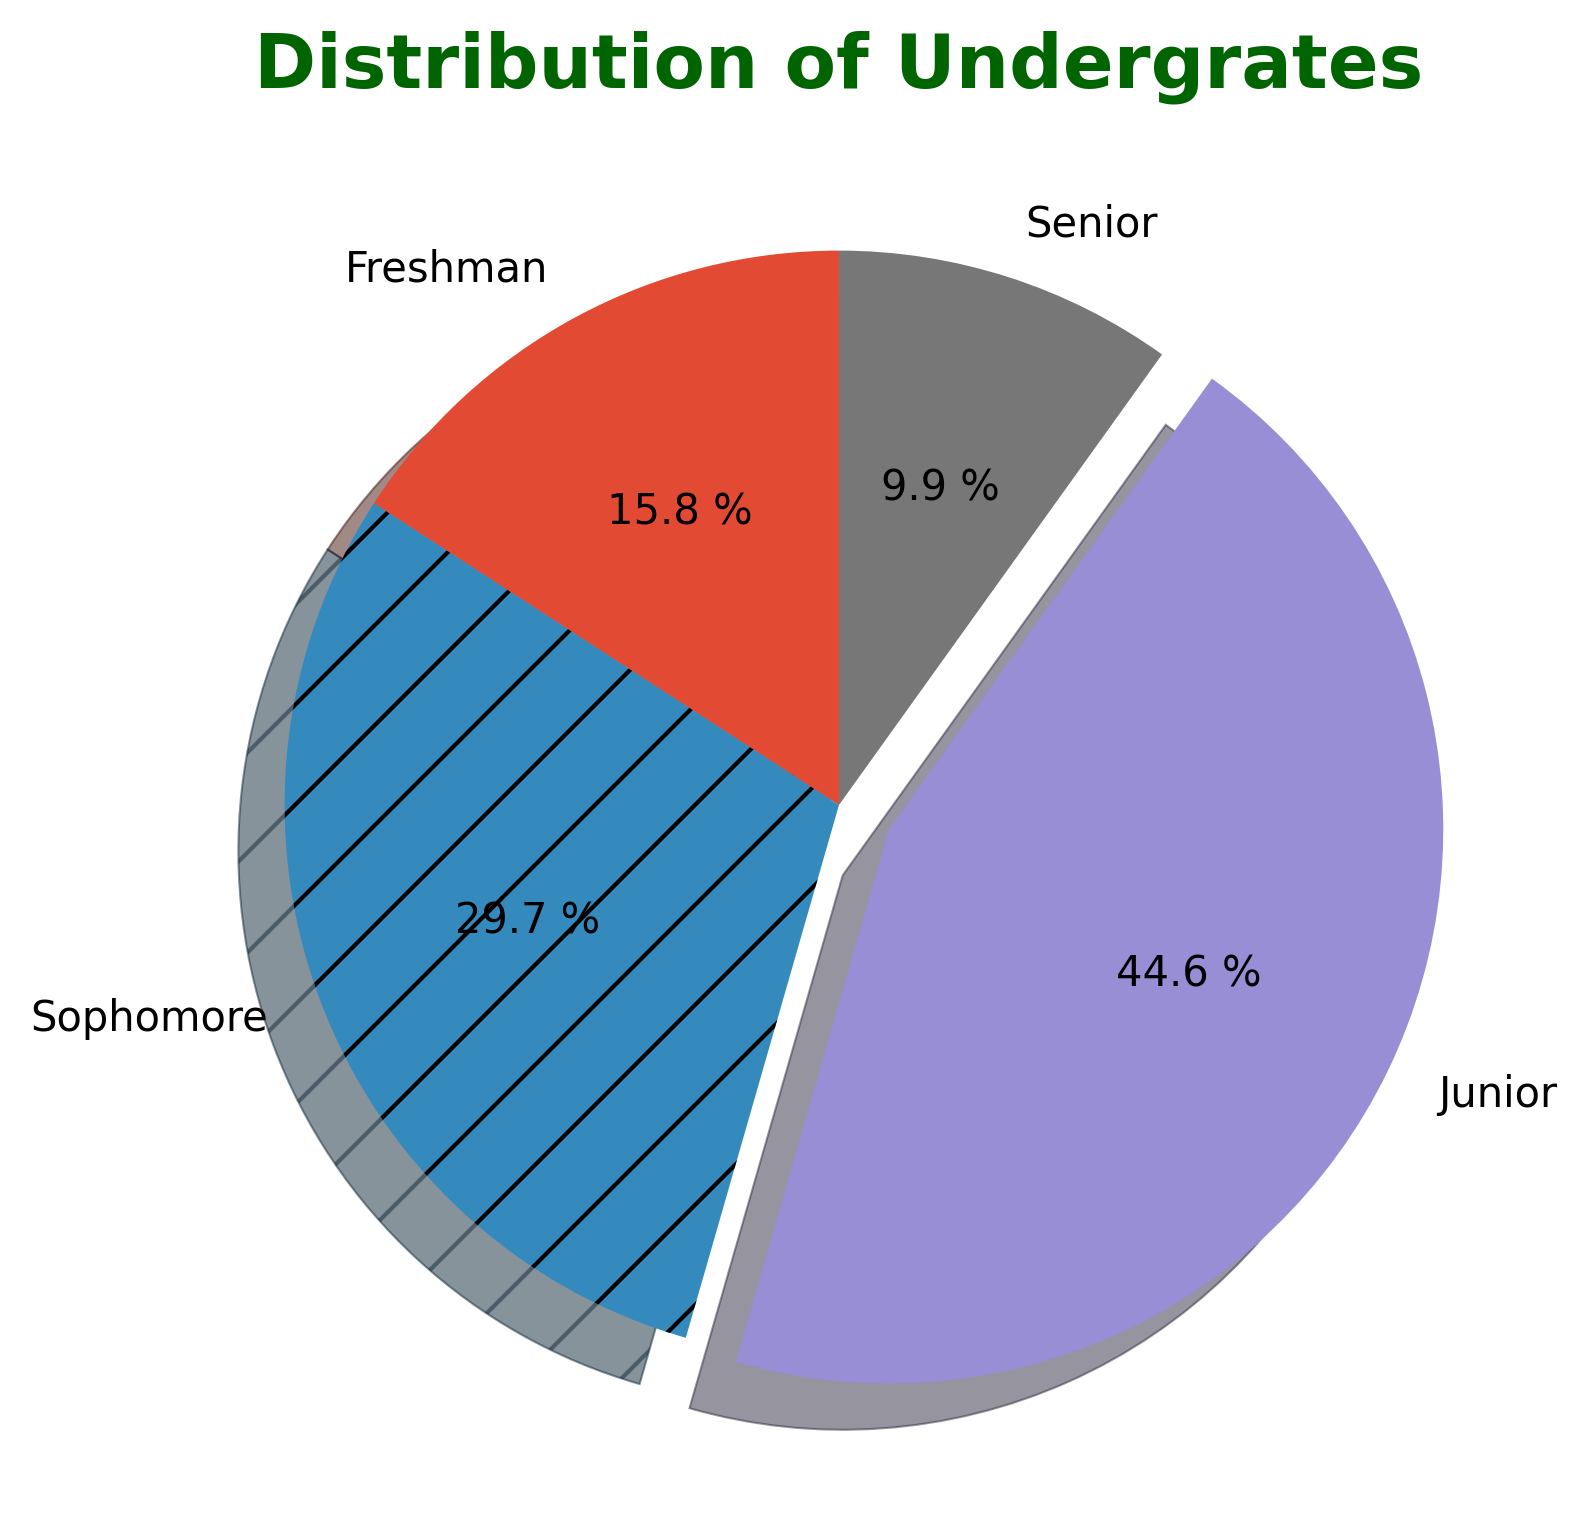

In [ ]:
# pie Chart

import matplotlib.pyplot as plt
# we set the figure size bigger at 6 by 6 inches
# dpi means dots/pixels per inch, it basically makes the graph sharper

plt.style.use("default")

labels = ["Freshman", "Sophomore", "Junior", "Senior"]
numbers = [16, 30, 45, 10]
explode = (0, 0, 0.1, 0)

plt.pie(numbers, labels = labels, explode = explode,
        autopct = "%.1f %%", shadow = True, startangle = 90)

plt.show()


# we set the figure size bigger at 6 by 6 inches
# dpi means dots/pixels per inch, it basically makes the graph sharper
plt.figure(figsize = (6,6), dpi = 300)

# we change the whole color scheme with matplotlib's built-in styles
# there are many more you can choose from
plt.style.use("ggplot")

labels = ["Freshman", "Sophomore", "Junior", "Senior"]
numbers = [16, 30, 45, 10]
explode = (0, 0, 0.1, 0)
# added hatches for all the pie pieces, but really only for the second one
# there are more kinds of hatches you can choose from too!
hatches = ["", "/", "", ""]

plt.pie(numbers, labels = labels, explode = explode,
        autopct = "%.1f %%", shadow = True, startangle = 90, hatch = hatches) # do not forget to assign the hatch

# finally, we have added a title for the graph
# fontdict gives us access to pass on more cutomization of the font for the title in the form of a dictionary
# fontdict is a parameter for many text based methods/functions in matplotlib, like xlabel and ylabel in a line graph
plt.title("Distribution of Undergrates", fontdict = {"color": "darkgreen","fontweight": "bold", "fontsize": 18})

plt.show()


*Making a pie chart with real data*

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
broome_df = pd.read_csv("Broome_County_Annual_Employee_Earnings__Beginning_2009_20240418.csv")

# broome_df = pd.read_csv("/content/sample_dataBroome_County_Annual_Employee_Earnings__Beginning_2009_20240418.csv")

# to get the exact data location -> right click -> copy path
plt.style.use("default")

plt.pie(numbers, labels = labels, explode = explode,
        autopct = "%.1f %%", shadow = True, startangle = 90)

fp_data = broome_df["Full or Part Time"].value_counts()
# VERY CASE SENSITIVE
plt.pie(fp_data)

# how do I add the numbers with this?

plt.show()

NameError: name 'labels' is not defined

# Making a historgram with real data

*Now let’s move on to a new type of graph: histogram
* We want to compare the annual salary distribution of our broome county employees in 2023.
* First, we need to prep our data again:
* We want to take a slice of the broome_df. We have two filtering conditions (broome_df["Earnings Year"] == 2023) and (broome_df["Full or Part Time"] == "F")
* Once we have this new df, we are only interested in the column “Total Earnings”, which contain all the data we need for our graph!


In [ ]:
temp_df = broome_df.loc[(broome_df["Earnings Year"] == 2023) & (broome_df["Full or Part Time"] == "F")]
salaries_2023_data = temp_df["Total Earnings"]


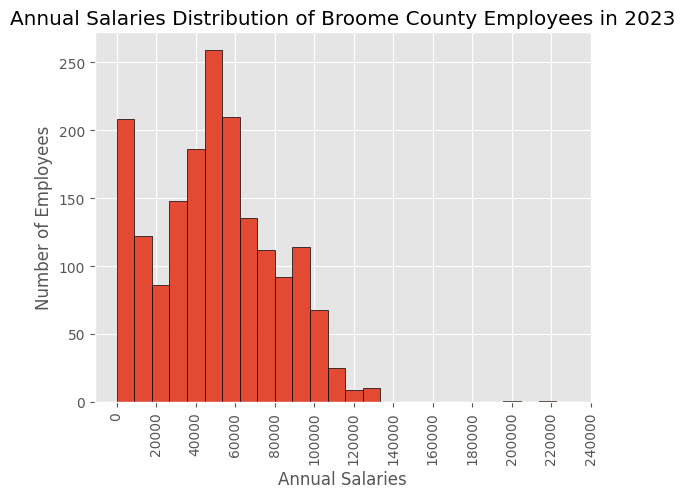

In [ ]:
temp_df = broome_df.loc[(broome_df["Earnings Year"] == 2023) & (broome_df["Full or Part Time"] == "F")]
salaries_2023_data = temp_df["Total Earnings"]

## prep the data:
# get the top 10 departments based on their number of people using slicing
departments = broome_df["Department"].value_counts()[:10]
# turn the 10 department names into a list
departments_list = departments.index.to_list()
# now, we can filter broome_df to include only the 10 departments
# isin() is kind of like "in" in python.
new_df = broome_df.loc[broome_df["Department"].isin(departments_list)]

# we can change bins parameter value to show more details of our data
plt.hist(salaries_2023_data, bins = 25, edgecolor = "black")
# bins represent the number of splits in the x axis.

plt.xlabel("Annual Salaries")
plt.ylabel("Number of Employees")

# specifying the list of integers for xticks range
custom_xticks = range(0,240_001,20_000)
# rotate our xticks values by 90 degrees, so they do not bunch together
plt.xticks(custom_xticks, rotation = 90)

plt.title("Annual Salaries Distribution of Broome County Employees in 2023")

plt.show()


## there is the same amount of data in both bins, so there

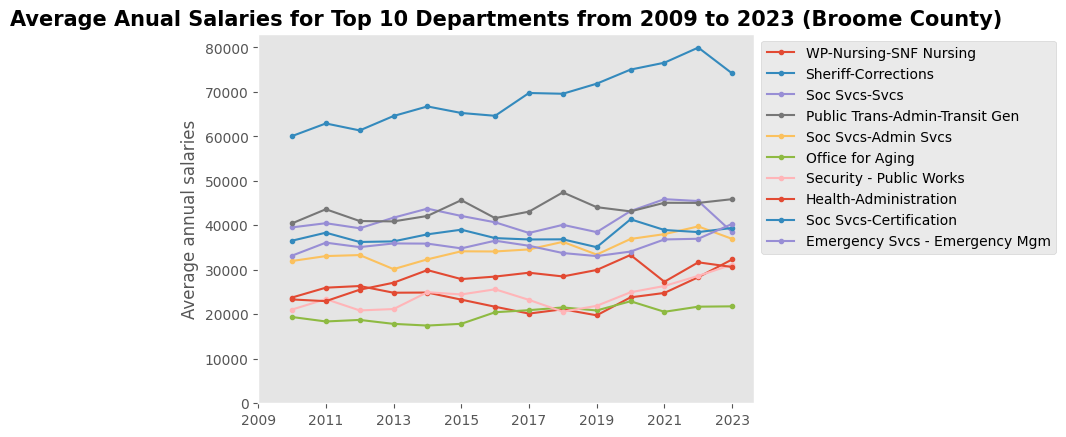

In [ ]:
# shitty graph

temp_df = broome_df.loc[(broome_df["Earnings Year"] == 2023) & (broome_df["Full or Part Time"] == "F")]
salaries_2023_data = temp_df["Total Earnings"]

## prep the data:
# get the top 10 departments based on their number of people using slicing
departments = broome_df["Department"].value_counts()[:10]
# turn the 10 department names into a list
departments_list = departments.index.to_list()
# now, we can filter broome_df to include only the 10 departments
# isin() is kind of like "in" in python.
new_df = broome_df.loc[broome_df["Department"].isin(departments_list)]

# each year's average annual salaries for 10 departments plotted separately
# one department's line in each iteration in the loop
for department in departments_list:
    per_department_df = new_df.loc[new_df["Department"] == department]
    average_salary_series = per_department_df.groupby("Earnings Year")["Total Earnings"].mean().round()
    # .index gives us access to the series object's index numbers
    # .values gives us access to the series object's values!
    years = average_salary_series.index
    average_salaries = average_salary_series.values
    # the label parameter is used to assign a label to a plotted line.
    # this label is then used in the legend to identify which line corresponds to which label name
    # the marker parameter is used to specify the marker style for data points on the plotted line
    plt.plot(years,average_salaries, label = department, marker = ".")

plt.ylabel("Average annual salaries")

# we can customize the range for our xticks and yticks!
# remember our good old range(start-inclusive, stop-exclusive, step)
custom_xticks = range(2009, 2024, 2)
plt.xticks(custom_xticks)

custom_yticks = range(0, 90_000, 10_000)
plt.yticks(custom_yticks)

plt.title("Average Anual Salaries for Top 10 Departments from 2009 to 2023 (Broome County)",
          fontdict = {"fontweight": "bold", "fontsize": 15})

# this moves our legend outside the plot, so the legend is not blocking our plot
plt.legend(bbox_to_anchor = (1,1))

plt.grid() # turned the grid on to facilitate reading the data (by default it is off)

# we can save our graph/figure in the same folder of our notebook! do not forget the image extension!
plt.savefig("Average Annual Salaries for Top 10 Departments from 2009 to 2023 (Broome County).png", dpi = 300)

plt.show()




ONLY TRYING TO PLOT ONE LINE:

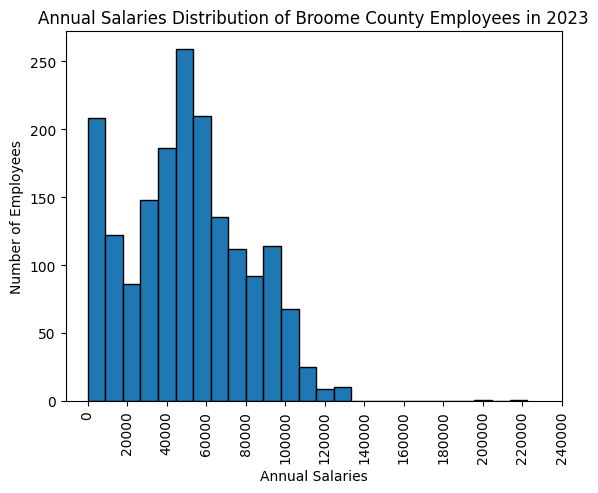

In [ ]:
plt.hist(salaries_2023_data, bins = 25, edgecolor = "black")

plt.xlabel("Annual Salaries")
plt.ylabel("Number of Employees")

custom_xticks = range(0,240_001,20_000)

# rotate tour x ticks values by 90 degrees, so they do not bunch togeher

plt.xticks(custom_xticks, rotation = 90)

plt.title("Annual Salaries Distribution of Broome County Employees in 2023")

plt.show()

In [ ]:
## prep the data:
# get the top 10 departments based on their number of people using slicing
departments = broome_df["Department"].value_counts()[:10]
# turn the 10 department names into a list
departments_list = departments.index.to_list()
# now, we can filter broome_df to include only the 10 departments
# isin() is kind of like "in" in python.
new_df = broome_df.loc[broome_df["Department"].isin(departments_list)]


department1 = departments_list
department1_df = new_df.loc[new_df["Department"] == department1]
average_salary_department1 = department1_df.groupby("Earnings Year")["Total Earnings"].mean().round()
average_salary_department1

x = average_salary_department1.index
y = average_salary_department1.values

plt.xlabel("Year")
plt.ylabel("Total Earnings")

plt.plot(x,y, label = department1, marker = "0")

plt.legend()

plt.show()

ValueError: ('Lengths must match to compare', (18118,), (10,))